In [1]:
import numpy as np
import matplotlib.pyplot as plt

from model import CapacityDegradationModel
from util import (read_csv_dataset, plotting, plotting_compare, get_model_accuracy, plot_residuals_subplots)

from sklearn.metrics import (mean_absolute_error, mean_absolute_percentage_error, r2_score)

In [2]:
c_0 = 2.755
time = np.linspace(0, 1000, 100)

temp_333_15k = 333.15
capacity_333_15k_2_9v = read_csv_dataset(path_to_dataset="dataset/Dataset_2.9V_333.15K.csv")

temp_343_15k = 343.15
capacity_343_15k_2_9v = read_csv_dataset(path_to_dataset="dataset/Dataset_2.9V_343.15K.csv")

temp_353_15k = 353.15
capacity_353_15k_2_9v = read_csv_dataset(path_to_dataset="dataset/Dataset_2.9V_353.15K.csv")

experiment_data = {temp_333_15k: capacity_333_15k_2_9v, temp_343_15k: capacity_343_15k_2_9v, temp_353_15k: capacity_353_15k_2_9v}

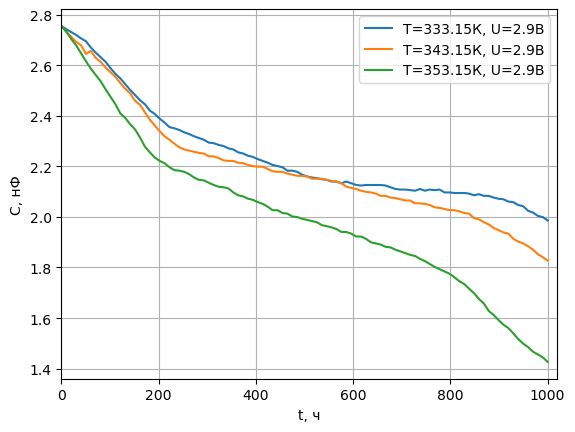

In [3]:
plotting(x=time, data=experiment_data)

In [4]:
# разделение набора данных
idx_0 = 0
idx_1, = np.where(np.abs(time - 202) < 1)[0]
idx_2, = np.where(np.abs(time - 797) < 1)[0]
idx_3, = np.where(np.abs(time - 1000) < 1)[0]

time_01, time_12, time_23 = None, None, None
experiment_data_01, experiment_data_12, experiment_data_23 = {}, {}, {}
data_c0_01, data_c0_12, data_c0_23 = {}, {}, {}

for temp, data in experiment_data.items():
    
    # приработка
    time_01 = time[idx_0:idx_1] - time[idx_0]
    data_c0_01[temp] = np.max(data[idx_0:idx_1])
    experiment_data_01[temp] = data[idx_0:idx_1]

    # нормальная работа
    time_12 = time[idx_1:idx_2] - time[idx_1]
    data_c0_12[temp] = np.max(data[idx_1:idx_2])
    experiment_data_12[temp] = data[idx_1:idx_2]

    # старение
    time_23 = time[idx_2:idx_3] - time[idx_2]
    data_c0_23[temp] = np.max(data[idx_2:idx_3])
    experiment_data_23[temp] = data[idx_2:idx_3]

e_a = 1.0042306881493797e-20
Точность модели {333.15: [0.0, 6.26], 343.15: [0.0, 1.94], 353.15: [0.0, 1.22]}


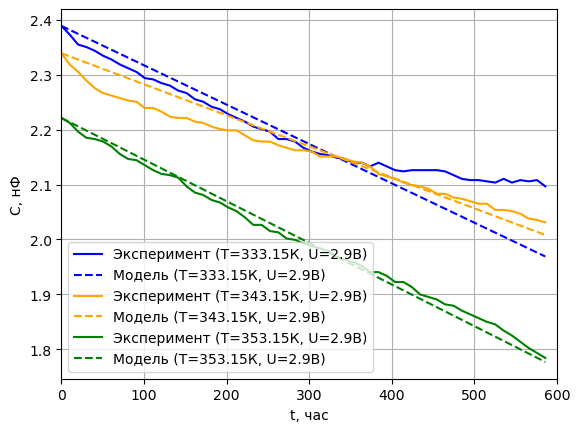

In [5]:
# обучение на участке нормальной работы
model_12 = CapacityDegradationModel(crit_ratio_c=0.9)
print("e_a =", model_12.fit(time_12, experiment_data_12))

model_data_12 = {temp_333_15k: None, temp_343_15k: None, temp_353_15k: None}
model_data_12 = model_12.predict(time_12, model_data_12, data_c0_12)

print("Точность модели", get_model_accuracy(data_true=experiment_data_12, data_pred=model_data_12))
plotting_compare(time_12, experiment_data_12, model_data=model_data_12)

In [6]:
# расчёт абсолютных метрик ошибки
mae_data = {temp_333_15k: None, temp_343_15k: None, temp_353_15k: None}
for temp in mae_data.keys():
    mae_data[temp] = np.round(mean_absolute_error(y_true=experiment_data_12[temp], y_pred=model_data_12[temp]), 2)
print(f"Mean Absolute Error: {mae_data}")

Mean Absolute Error: {333.15: 0.04, 343.15: 0.02, 353.15: 0.01}


In [9]:
# расчёт относительных метрик ошибки
mape_data = {temp_333_15k: None, temp_343_15k: None, temp_353_15k: None}
for temp in mape_data.keys():
    mape_data[temp] = np.round(mean_absolute_percentage_error(y_true=experiment_data_12[temp], y_pred=model_data_12[temp]) * 100, 2)
print(f"Mean Absolute Percentage Error: {mape_data} in %")

Mean Absolute Percentage Error: {333.15: 1.65, 343.15: 0.87, 353.15: 0.51} in %


In [12]:
# расчёт статистических метрик
r2_data = {temp_333_15k: None, temp_343_15k: None, temp_353_15k: None}
for temp in r2_data.keys():
    r2_data[temp] = np.round(r2_score(y_true=experiment_data_12[temp], y_pred=model_data_12[temp]), 2)
print(f"R2: {r2_data}")

R2: {333.15: 0.65, 343.15: 0.91, 353.15: 0.99}


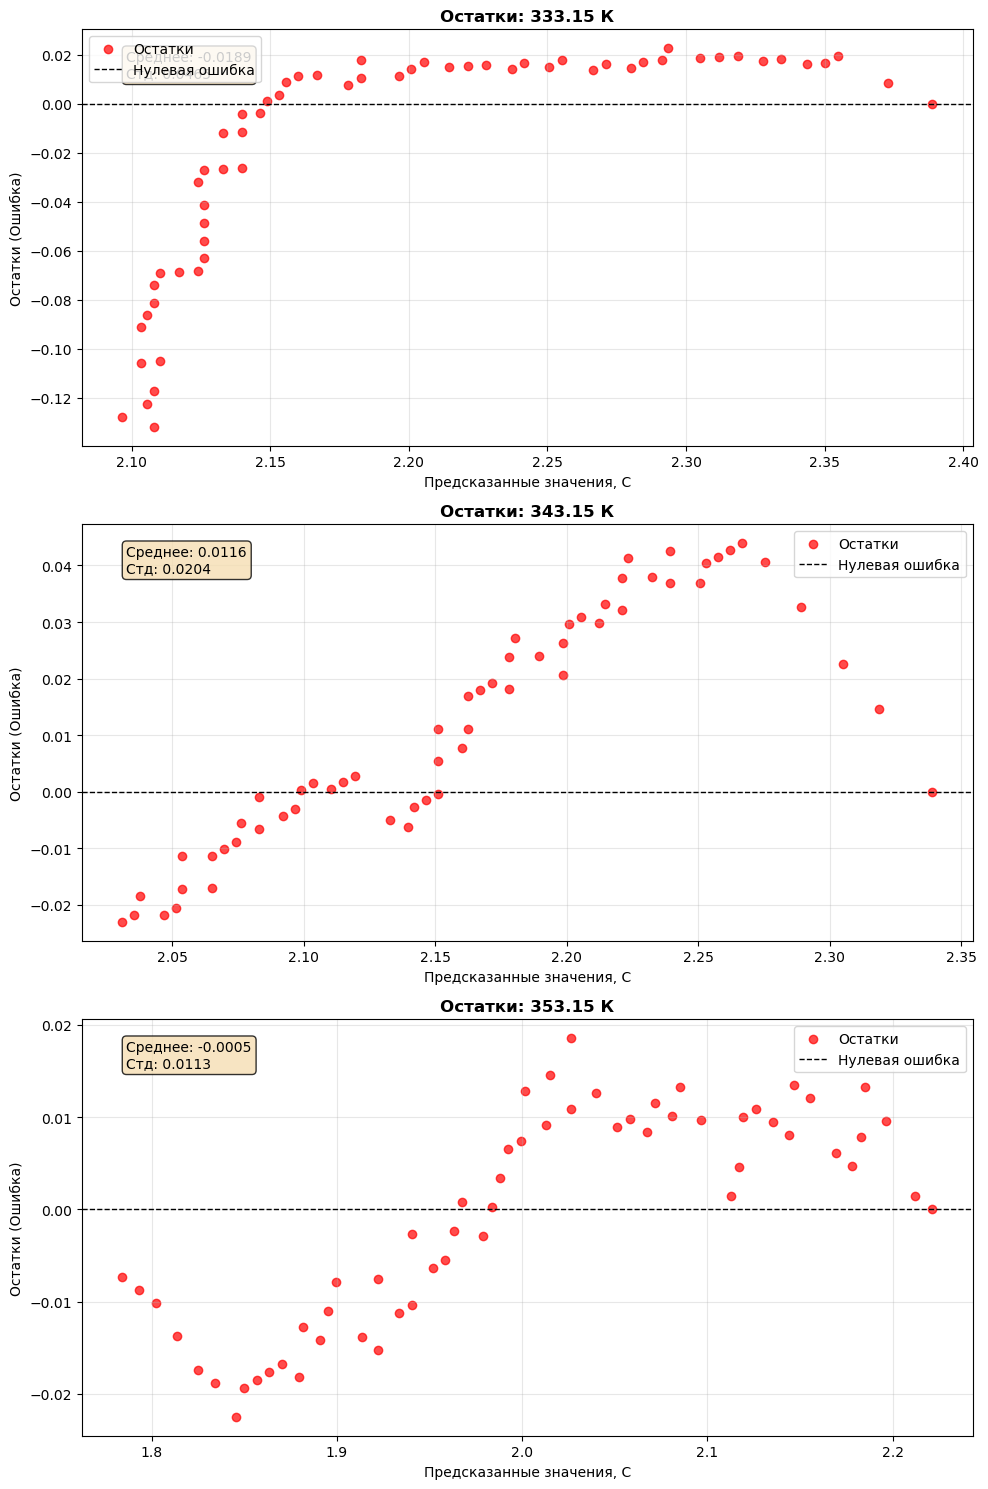

In [15]:
# анализ остатков
resudal_error_data = {temp_333_15k: None, temp_343_15k: None, temp_353_15k: None}
for temp in resudal_error_data.keys():
    resudal_error_data[temp] = model_data_12[temp] - experiment_data_12[temp]
plot_residuals_subplots(residual_error_data=resudal_error_data, model_predictions=experiment_data_12, path_to_save="figure/resudal.png")